In [1]:
!pip3 install razdel

You should consider upgrading via the '/home/pi/venv/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip3 install pymorphy2

     |████████████████████████████████| 55 kB 984 kB/s eta 0:00:011
     |████████████████████████████████| 8.2 MB 2.6 MB/s eta 0:00:01
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=6f4b70905118c68ba36dea3c843b27986bf486755a9e678b08ec2d965a1eea40
  Stored in directory: /home/pi/.cache/pip/wheels/3f/2a/fa/4d7a888e69774d5e6e855d190a8a51b357d77cc05eb1c097c9
Successfully built docopt
You should consider upgrading via the '/home/pi/venv/venv/bin/python -m pip install --upgrade pip' command.


Делаем доступ к Googl Drive

from google.colab import drive
drive.mount('/gdrive')

In [14]:
import pandas as pd

Наши новости

In [51]:
news = pd.read_csv("/home/pi/GeekBrains/ML_in_business/Lesson_2/dialogues.csv", sep = ',,', encoding='utf-8')
print(news.shape)
news.head(100)

(1068, 2)


/home/pi/venv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


doc_id                                              title
0        1                        Алло, бабушка, доброе утро!
1        2                       Привет, внученька! Как дела?
2        3  Бабушка, мама с папой разрешили мне пожить у т...
3        4  Конечно, внученька. Только вот у меня в саду м...
4        5  Нет, бабушка. Я буду тебе помогать. Что тебе н...
..     ...                                                ...
95      96                          Костя. Учусь в 8-м классе
96      97                             И что у нас случилось?
97      98      Температура, слабость, носоглотка так и горит
98      99  Бери сразу термометр, меряй температуру. Покаж...
99     100                                             А-а-а!

[100 rows x 2 columns]

Загрузим пользователей и списки последних прочитанных новостей

In [4]:
users = pd.read_csv("./users_articles.csv")
users.head(3)

uid                                        articles
0  u105138  [293672, 293328, 293001, 293622, 293126, 1852]
1  u108690          [3405, 1739, 2972, 1158, 1599, 322665]
2  u108339          [1845, 2009, 2356, 1424, 2939, 323389]

Итак, нам нужно получить векторные представления пользователей на основе прочитанным ими новостей и самих новостей

### 1. Получаем векторные представления новостей

In [7]:
!pip3 install gensim

     |████████████████████████████████| 23.9 MB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 6.9 MB/s  eta 0:00:01
You should consider upgrading via the '/home/pi/venv/venv/bin/python -m pip install --upgrade pip' command.


In [52]:
#from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

/home/pi/venv/venv/lib/python3.6/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [9]:
!pip3 install razdel

You should consider upgrading via the '/home/pi/venv/venv/bin/python -m pip install --upgrade pip' command.


In [11]:
!pip3 install nltk

     |████████████████████████████████| 1.4 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 979 kB/s  eta 0:00:01
     |████████████████████████████████| 723 kB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 74 kB 4.7 MB/s  eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434672 sha256=d16871aa2a58e78d93a3a7fe461a3b109ab01701b35c893ce3c7c8cb5a27a4db
  Stored in directory: /home/pi/.cache/pip/wheels/de/5e/42/64abaeca668161c3e2cecc24f864a8fc421e3d07a104fc8a51
Successfully built nltk
You should consider upgrading via the '/home/pi/venv/venv/bin/python -m pip install --upgrade pip' command.


In [53]:
#предобработка текстов
import re
import numpy as np
from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize

from razdel import tokenize # https://github.com/natasha/razdel
#!pip install razdel

import pymorphy2  # pip install pymorphy2

In [54]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/pi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
stopword_ru = stopwords.words('russian')
len(stopword_ru)

151

In [56]:
morph = pymorphy2.MorphAnalyzer()

In [18]:
with open('./stopwords.txt') as f:
    additional_stopwords = [w.strip() for w in f.readlines() if w]
stopword_ru += additional_stopwords
len(stopword_ru)

776

In [19]:
def clean_text(text):
    '''
    очистка текста
    
    на выходе очищеный текст
    
    '''
    if not isinstance(text, str):
        text = str(text)
    
    text = text.lower()
    text = text.strip('\n').strip('\r').strip('\t')
    text = re.sub("-\s\r\n\|-\s\r\n|\r\n", '', str(text))

    text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)
    text = re.sub(r"\r\n\t|\n|\\s|\r\t|\\n", ' ', text)
    text = re.sub(r'[\xad]|[\s+]', ' ', text.strip())
    
    #tokens = list(tokenize(text))
    #words = [_.text for _ in tokens]
    #words = [w for w in words if w not in stopword_ru]
    
    #return " ".join(words)
    return text

cache = {}

def lemmatization(text):
    '''
    лемматизация
        [0] если зашел тип не `str` делаем его `str`
        [1] токенизация предложения через razdel
        [2] проверка есть ли в начале слова '-'
        [3] проверка токена с одного символа
        [4] проверка есть ли данное слово в кэше
        [5] лемматизация слова
        [6] проверка на стоп-слова

    на выходе лист отлемматизированых токенов
    '''

    # [0]
    if not isinstance(text, str):
        text = str(text)
    
    # [1]
    tokens = list(tokenize(text))
    words = [_.text for _ in tokens]

    words_lem = []
    for w in words:
        if w[0] == '-': # [2]
            w = w[1:]
        if len(w)>1: # [3]
            if w in cache: # [4]
                words_lem.append(cache[w])
            else: # [5]
                temp_cach = cache[w] = morph.parse(w)[0].normal_form
                words_lem.append(temp_cach)
    
    words_lem_without_stopwords=[i for i in words_lem if not i in stopword_ru] # [6]
    
    return words_lem_without_stopwords

In [20]:
%%time
#Запускаем очистку текста. Будет долго...
news['title'] = news['title'].apply(lambda x: clean_text(x), 1)

CPU times: user 21.8 s, sys: 1.26 s, total: 23.1 s
Wall time: 23.1 s


In [21]:
%%time
#Запускаем лемматизацию текста. Будет очень долго...
news['title'] = news['title'].apply(lambda x: lemmatization(x), 1)

CPU times: user 3min 5s, sys: 169 ms, total: 3min 6s
Wall time: 3min 6s


А теперь в 3 строчки обучим нашу модель

In [22]:
#сформируем список наших текстов, разбив еще и на пробелы
texts = [t for t in news['title'].values]

# Create a corpus from a list of texts
common_dictionary = Dictionary(texts)
common_corpus = [common_dictionary.doc2bow(text) for text in texts]

Что такое common_dictionary и как он выглядит

In [23]:
common_dictionary[5]

'банк'

In [24]:
common_corpus[0][0]

(0, 5)

In [25]:
len(texts[0])

118

In [26]:
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

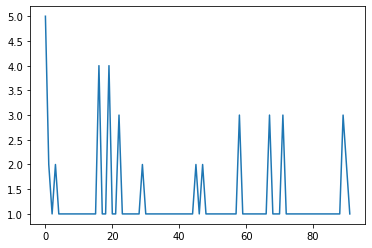

In [27]:
plt.plot(csr_matrix(common_corpus[0]).todense()[:,1])
plt.show()

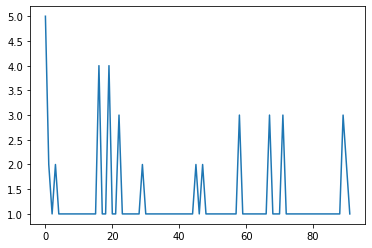

In [28]:
plt.plot(csr_matrix(common_corpus[0]).todense()[:,1])
plt.show()

Все просто - это словарь наших слов

Запускаем обучение

In [29]:
%%time
from gensim.models import LdaModel
# Train the model on the corpus.
lda = LdaModel(common_corpus, num_topics=25, id2word=common_dictionary)#, passes=10)

CPU times: user 1min 45s, sys: 56.7 s, total: 2min 42s
Wall time: 56.7 s


In [30]:
from gensim.test.utils import datapath
# Save model to disk.
temp_file = datapath("model.lda")
lda.save(temp_file)

# Load a potentially pretrained model from disk.
lda = LdaModel.load(temp_file)

Обучили модель. Теперь 2 вопроса:

1. как выглядят наши темы
2. как получить для документа вектор значений (вероятности принадлежности каждой теме)

In [31]:
# Create a new corpus, made of previously unseen documents.
other_texts = [t for t in news['title'].iloc[:3]]
other_corpus = [common_dictionary.doc2bow(text) for text in other_texts]

unseen_doc = other_corpus[2]
print(other_texts[2])
lda[unseen_doc] 

['форвард', 'авангард', 'томаш', 'заборский', 'прокомментировать', 'игра', 'команда', 'матч', 'чемпионат', 'кхл', 'против', 'атланта', 'nnnn', 'плохой', 'матч', 'нижний', 'новгород', 'против', 'торпедо', 'настраиваться', 'первый', 'минута', 'включиться', 'заборский', 'получиться', 'забросить', 'быстрый', 'гол', 'задать', 'хороший', 'темп', 'поединок', 'играть', 'хороший', 'сторона', 'пять', 'очко', 'выезд', 'девять', 'хороший']


[(0, 0.25115326),
 (7, 0.022071552),
 (11, 0.16473418),
 (16, 0.06357769),
 (20, 0.47741607)]

In [32]:
x=lda.show_topics(num_topics=25, num_words=7,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Only Words 
for topic,words in topics_words:
    print("topic_{}: ".format(topic)+" ".join(words))

topic_0: эксперимент солнце налог рейс земля небо погода
topic_1: рот скромный климат ужасный боль поспособствовать риска
topic_2: сша гражданин статья американский nn россия опубликовать
topic_3: снижение препарат применение след ресурс мышь высота
topic_4: рынок млн земля стоимость участок торговый продукция
topic_5: журнал научный взрыв форум общество турция двигатель
topic_6: млрд рубль млн рост цена составить бюджет
topic_7: университет энергия студент характерный лауреат стол журнал
topic_8: банк россия nn российский газета правительство экономика
topic_9: космос страдать космонавт американский оборудование доклад превысить
topic_10: кольцо норвежский близость норматив грубый выдать нежели
topic_11: жизнь ребёнок день возраст мужчина летний всё
topic_12: исследование наука территория пациент поверхность школа смерть
topic_13: газ еда вход золото метан всплеск николас
topic_14: проект nn новый место эксперт женщина первый
topic_15: россия поток северный сша медведев расчёт соглаше

Очень неплохо - большинство тем вполне можно описать о чем они


построим темы 

In [33]:
news['title'].iloc[5]

['ио',
 'главное',
 'тренер',
 'вячеслав',
 'буцай',
 'прокомментировать',
 'победа',
 'югра',
 'матч',
 'регулярный',
 'чемпионат',
 'кхл',
 'nn',
 'прежде',
 'хотеть',
 'поблагодарить',
 'ребята',
 'команда',
 'передавать',
 'официальный',
 'сайт',
 'югра',
 'игра',
 'начинаться',
 'очень',
 'удачно',
 'пропустить',
 'гол',
 'первый',
 'смена',
 'долго',
 'входить',
 'игра',
 'связать',
 'дневный',
 'матч',
 'непривычный',
 'плюс',
 'третий',
 'матч',
 'сибирь',
 'гдеть',
 'ребята',
 'чувствовать',
 'скажем',
 'сонный',
 'второй',
 'третий',
 'период',
 'показать',
 'разбежаться',
 'играть',
 'правильно',
 'появиться',
 'момент',
 'дотерпеть',
 'заслуженно',
 'победить']

In [34]:
lda[common_dictionary.doc2bow(news['title'].iloc[5])]

[(0, 0.20563202), (1, 0.038335383), (11, 0.118061386), (20, 0.62337464)]

Давайте напишем функцию, которая будет нам возвращать векторное представление новости

In [35]:
#text = news['title'].iloc[0]

def get_lda_vector(text):
    unseen_doc = common_dictionary.doc2bow(text)
    lda_tuple = lda[unseen_doc]
    not_null_topics = dict(zip([i[0] for i in lda_tuple], [i[1] for i in lda_tuple]))

    output_vector = []
    for i in range(25):
        if i not in not_null_topics:
            output_vector.append(0)
        else:
            output_vector.append(not_null_topics[i])
    return np.array(output_vector)

In [36]:
topic_matrix = pd.DataFrame([get_lda_vector(text) for text in news['title'].values])
topic_matrix.columns = ['topic_{}'.format(i) for i in range(25)]
topic_matrix['doc_id'] = news['doc_id'].values
topic_matrix = topic_matrix[['doc_id']+['topic_{}'.format(i) for i in range(25)]]
topic_matrix.head(5)

doc_id   topic_0  topic_1   topic_2   topic_3  topic_4   topic_5  topic_6  \
0       6  0.000000      0.0  0.000000  0.000000      0.0  0.000000      0.0   
1    4896  0.487091      0.0  0.000000  0.000000      0.0  0.488682      0.0   
2    4897  0.251037      0.0  0.000000  0.000000      0.0  0.000000      0.0   
3    4898  0.062312      0.0  0.237868  0.000000      0.0  0.000000      0.0   
4    4899  0.000000      0.0  0.000000  0.020113      0.0  0.000000      0.0   

    topic_7   topic_8  ...  topic_15  topic_16  topic_17  topic_18  topic_19  \
0  0.000000  0.963588  ...       0.0  0.000000       0.0       0.0       0.0   
1  0.000000  0.000000  ...       0.0  0.000000       0.0       0.0       0.0   
2  0.022072  0.000000  ...       0.0  0.063589       0.0       0.0       0.0   
3  0.000000  0.000000  ...       0.0  0.000000       0.0       0.0       0.0   
4  0.000000  0.555077  ...       0.0  0.000000       0.0       0.0       0.0   

   topic_20  topic_21  topic_22  topic_23  topic_24  
0  0.000000       0.0  0.000000       0.0  0.000000  
1  0.000000       0.0  0.000000       0.0  0.000000  
2  0.477356       0.0  0.000000       0.0  0.000000  
3  0.588091       0.0  0.000000       0.0  0.000000  
4  0.000000       0.0  0.045767       0.0  0.194972  

[5 rows x 26 columns]

Прекрасно, мы получили вектора наших новостей! И даже умеем интерпретировать получившиеся темы.

Можно двигаться далее

### Следующий шаг - векторные представления пользователей

In [105]:
users.head(3)

uid                                        articles
0  u105138  [293672, 293328, 293001, 293622, 293126, 1852]
1  u108690          [3405, 1739, 2972, 1158, 1599, 322665]
2  u108339          [1845, 2009, 2356, 1424, 2939, 323389]

In [106]:
doc_dict = dict(zip(topic_matrix['doc_id'].values, topic_matrix[['topic_{}'.format(i) for i in range(25)]].values))

In [107]:
doc_dict[293622]

array([0.        , 0.        , 0.1466589 , 0.01984466, 0.        ,
       0.073759  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.22963601, 0.        , 0.        , 0.07572754,
       0.        , 0.        , 0.        , 0.        , 0.10595463,
       0.        , 0.        , 0.01796165, 0.16953991, 0.15005432])

#### считаем по медиане

In [108]:
user_articles_list = users['articles'].iloc[33]

def get_user_embedding(user_articles_list):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    user_vector = np.median(user_vector, 0)
    return user_vector

#### считаем по максимуму

In [109]:
def get_user_embedding_max(user_articles_list):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    user_vector = np.max(user_vector, 0)
    return user_vector

In [110]:
get_user_embedding(user_articles_list)

array([0.        , 0.        , 0.06217223, 0.        , 0.        ,
       0.01184805, 0.        , 0.        , 0.19872583, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00916741, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.29207109, 0.        ])

Интересовался новостями с топиками topic_3, topic_14 (что-то про политику и государство)

In [111]:
get_user_embedding_max(user_articles_list)

array([0.        , 0.        , 0.20108835, 0.        , 0.05582255,
       0.17340448, 0.05321983, 0.01287131, 0.31218451, 0.01603561,
       0.01255199, 0.07535413, 0.04966058, 0.07690817, 0.11847619,
       0.03573847, 0.        , 0.        , 0.        , 0.32363716,
       0.19470903, 0.23299555, 0.        , 0.60490078, 0.19289333])

In [112]:
#users['articles'].iloc[33]

In [113]:
#" ".join(news[news['doc_id']==323186]['title'].iloc[0])

Теперь получим эмбединги для всех пользователей и проверим их качество на конкретной downstream-задаче

In [114]:
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding(x), 1)])
user_embeddings.columns = ['topic_{}'.format(i) for i in range(25)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+['topic_{}'.format(i) for i in range(25)]]
user_embeddings.head(3)

uid  topic_0  topic_1   topic_2  topic_3  topic_4  topic_5  topic_6  \
0  u105138      0.0      0.0  0.078326      0.0      0.0  0.00000      0.0   
1  u108690      0.0      0.0  0.108037      0.0      0.0  0.01936      0.0   
2  u108339      0.0      0.0  0.066721      0.0      0.0  0.00000      0.0   

   topic_7   topic_8  ...  topic_15  topic_16  topic_17  topic_18  topic_19  \
0      0.0  0.000000  ...       0.0       0.0       0.0  0.000000  0.067037   
1      0.0  0.122422  ...       0.0       0.0       0.0  0.030319  0.007035   
2      0.0  0.116297  ...       0.0       0.0       0.0  0.000000  0.000000   

   topic_20  topic_21  topic_22  topic_23  topic_24  
0  0.000000  0.000000       0.0  0.176870  0.054922  
1  0.098525  0.008011       0.0  0.151642  0.061690  
2  0.000000  0.019293       0.0  0.346126  0.067196  

[3 rows x 26 columns]

In [115]:
user_embeddings_max = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding_max(x), 1)])
user_embeddings_max.columns = ['topic_{}'.format(i) for i in range(25)]
user_embeddings_max['uid'] = users['uid'].values
user_embeddings_max = user_embeddings_max[['uid']+['topic_{}'.format(i) for i in range(25)]]
user_embeddings_max.head(3)

uid   topic_0  topic_1   topic_2   topic_3   topic_4   topic_5  \
0  u105138  0.239095      0.0  0.389048  0.053609  0.199736  0.124443   
1  u108690  0.020491      0.0  0.299947  0.019842  0.035400  0.073469   
2  u108339  0.088075      0.0  0.177536  0.010427  0.102139  0.090297   

    topic_6   topic_7   topic_8  ...  topic_15  topic_16  topic_17  topic_18  \
0  0.085365  0.039101  0.475450  ...  0.062103  0.153828  0.000000  0.335783   
1  0.170856  0.031380  0.182133  ...  0.176360  0.015927  0.017553  0.160503   
2  0.110513  0.000000  0.259834  ...  0.086886  0.000000  0.000000  0.000000   

   topic_19  topic_20  topic_21  topic_22  topic_23  topic_24  
0  0.138073  0.013160  0.000000  0.042524  0.362283  0.177157  
1  0.097903  0.313788  0.056193  0.000000  0.445219  0.158660  
2  0.034897  0.058676  0.059233  0.000000  0.595878  0.185705  

[3 rows x 26 columns]

Датасет готов - можно попробовать обучить модель. Загрузим нашу разметку

In [116]:
target = pd.read_csv("./users_churn.csv")
target.head(3)

uid  churn
0  u107120      0
1  u102277      0
2  u102444      0

In [117]:
X = pd.merge(user_embeddings, target, 'left')
X.head(3)

uid  topic_0  topic_1   topic_2  topic_3  topic_4  topic_5  topic_6  \
0  u105138      0.0      0.0  0.078326      0.0      0.0  0.00000      0.0   
1  u108690      0.0      0.0  0.108037      0.0      0.0  0.01936      0.0   
2  u108339      0.0      0.0  0.066721      0.0      0.0  0.00000      0.0   

   topic_7   topic_8  ...  topic_16  topic_17  topic_18  topic_19  topic_20  \
0      0.0  0.000000  ...       0.0       0.0  0.000000  0.067037  0.000000   
1      0.0  0.122422  ...       0.0       0.0  0.030319  0.007035  0.098525   
2      0.0  0.116297  ...       0.0       0.0  0.000000  0.000000  0.000000   

   topic_21  topic_22  topic_23  topic_24  churn  
0  0.000000       0.0  0.176870  0.054922      0  
1  0.008011       0.0  0.151642  0.061690      1  
2  0.019293       0.0  0.346126  0.067196      1  

[3 rows x 27 columns]

In [118]:
X_max = pd.merge(user_embeddings_max, target, 'left')
X_max.head(3)

uid   topic_0  topic_1   topic_2   topic_3   topic_4   topic_5  \
0  u105138  0.239095      0.0  0.389048  0.053609  0.199736  0.124443   
1  u108690  0.020491      0.0  0.299947  0.019842  0.035400  0.073469   
2  u108339  0.088075      0.0  0.177536  0.010427  0.102139  0.090297   

    topic_6   topic_7   topic_8  ...  topic_16  topic_17  topic_18  topic_19  \
0  0.085365  0.039101  0.475450  ...  0.153828  0.000000  0.335783  0.138073   
1  0.170856  0.031380  0.182133  ...  0.015927  0.017553  0.160503  0.097903   
2  0.110513  0.000000  0.259834  ...  0.000000  0.000000  0.000000  0.034897   

   topic_20  topic_21  topic_22  topic_23  topic_24  churn  
0  0.013160  0.000000  0.042524  0.362283  0.177157      0  
1  0.313788  0.056193  0.000000  0.445219  0.158660      1  
2  0.058676  0.059233  0.000000  0.595878  0.185705      1  

[3 rows x 27 columns]

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#import itertools

import matplotlib.pyplot as plt

%matplotlib inline

In [120]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X[['topic_{}'.format(i) for i in range(25)]], 
                                                    X['churn'], random_state=0)

In [121]:
#разделим данные на train/test
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X_max[['topic_{}'.format(i) for i in range(25)]], 
                                                    X_max['churn'], random_state=0)

In [122]:
logreg = LogisticRegression()
#обучим наш пайплайн
logreg.fit(X_train, y_train)

LogisticRegression()

In [123]:
logreg_max = LogisticRegression()
#обучим наш пайплайн
logreg_max.fit(X_train_max, y_train_max)

LogisticRegression()

In [124]:
#наши прогнозы для тестовой выборки
preds = logreg.predict_proba(X_test)[:, 1]
preds[:10]

array([0.15816125, 0.02558241, 0.29531489, 0.16541361, 0.37078496,
       0.05352092, 0.12346037, 0.06750447, 0.23718857, 0.15526846])

In [125]:
#наши прогнозы для тестовой выборки
preds_max = logreg_max.predict_proba(X_test_max)[:, 1]
preds_max[:10]

array([0.34168059, 0.03933935, 0.40906748, 0.02265463, 0.01720972,
       0.05977967, 0.00734366, 0.0638995 , 0.46046668, 0.2427568 ])

In [126]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

### Рассчитаем Precision, Recall, F_score

#### эмбединг по медиане

In [127]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.254948, F-Score=0.673, Precision=0.647, Recall=0.702


#### эмбединг по максимуму

In [131]:
precision_max, recall_max, thresholds_max = precision_recall_curve(y_test_max, preds_max)
fscore_max = (2 * precision_max * recall_max) / (precision_max + recall_max)
# locate the index of the largest f score
ix = np.argmax(fscore_max)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds_max[ix], 
                                                                        fscore_max[ix],
                                                                        precision_max[ix],
                                                                        recall_max[ix]))

Best Threshold=0.382578, F-Score=0.733, Precision=0.762, Recall=0.706


In [72]:
import itertools

In [132]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1593  162]
 [  43  202]]


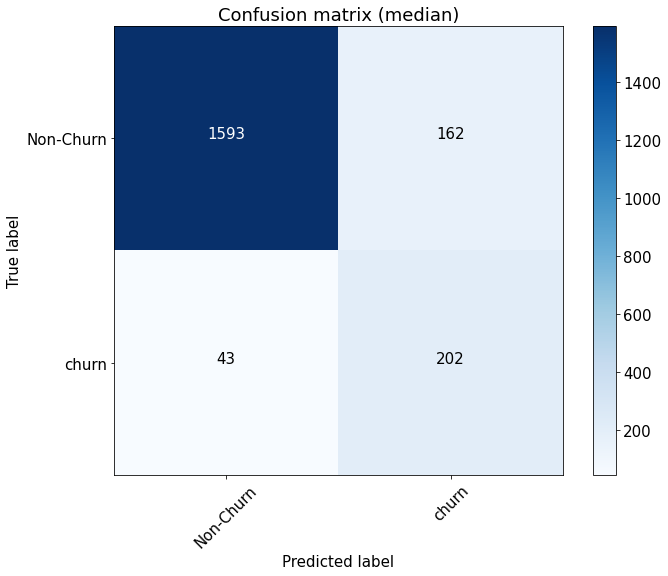

In [137]:
#мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds>thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix (median)')
plt.savefig("conf_matrix.png")
plt.show()

Confusion matrix, without normalization
[[1701   54]
 [  73  172]]


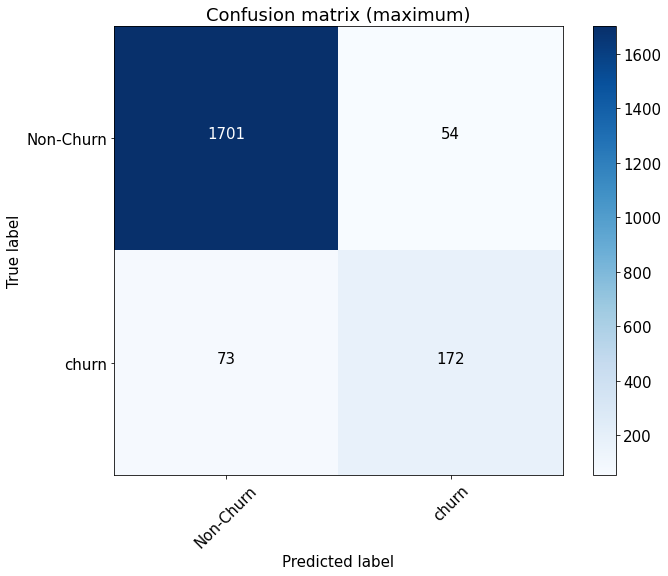

In [138]:
#мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_max = confusion_matrix(y_test_max, preds_max>thresholds_max[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_max, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix (maximum)')
plt.savefig("conf_matrix.png")
plt.show()

In [139]:
roc_auc_score(y_test_max, preds_max)

0.9582557125414269

### Вывод: эмбединге по максимуму результаты получаются лучше

В целом мы видим, что получившиеся векторные представления содержат какой-то сигнал и позволяют решать нашу прикладную задачу. 

### Домашнее задание

1. Самостоятельно разобраться с тем, что такое tfidf (документация https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html и еще - https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
2. Модифицировать код функции get_user_embedding таким образом, чтобы считалось не среднее (как в примере np.mean), а медиана. Применить такое преобразование к данным, обучить модель прогнозирования оттока и посчитать метрики качества и сохранить их: roc auc, precision/recall/f_score (для 3 последних - подобрать оптимальный порог с помощью precision_recall_curve, как это делалось на уроке)
3. Повторить п.2, но используя уже не медиану, а max
4. (опциональное, если очень хочется) Воспользовавшись полученными знаниями из п.1, повторить пункт 2, но уже взвешивая новости по tfidf (подсказка: нужно получить веса-коэффициенты для каждого документа. Не все документы одинаково информативны и несут какой-то положительный сигнал). Подсказка 2 - нужен именно idf, как вес.
5. Сформировать на выходе единую таблицу, сравнивающую качество 3 разных метода получения эмбедингов пользователей: mean, median, max, idf_mean по метрикам roc_auc, precision, recall, f_score
6. Сделать самостоятельные выводы и предположения о том, почему тот или ной способ оказался эффективнее остальных

#### Ссылки

1. http://www.machinelearning.ru/wiki/images/d/d5/Voron17survey-artm.pdf
2. https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

#### Библиотеки, которые нужно установить:

1. gensim
2. razdel
3. pymorphy2
4. nltk